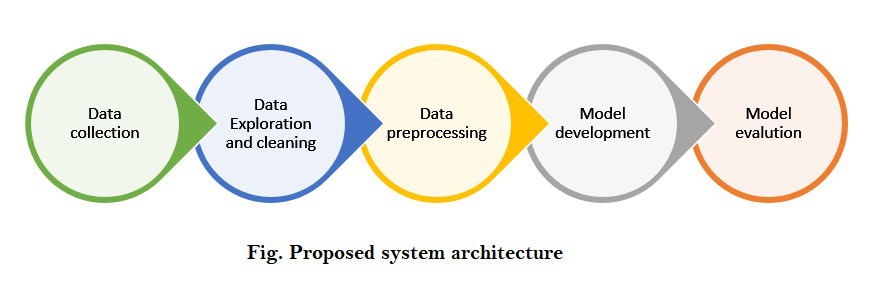

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
ipl = pd.read_csv('0y clean data pre ipl.csv')
ipl.head()


,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [3]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data.head()


,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [4]:
ipl = ipl.drop(["Unnamed: 0", "extras", "match_id", "runs_off_bat"], axis=1)

In [5]:
new_ipl = pd.merge(ipl, data, left_on="striker", right_on="Player", how="left")

In [6]:
new_ipl.drop(["wicket_type", "player_dismissed"], axis=1, inplace=True)

In [7]:
new_ipl.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'run', 'wickets', 'truns', 'y', 'Team',
       'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets',
       'Catches Taken', 'Stumpings Made'],
      dtype='object')

In [8]:
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna(".")

In [9]:
listf = []
for c in new_ipl.columns:
    if new_ipl[c].dtype==object:
        print(c,"->" ,new_ipl[c].dtype)
        listf.append(c)

venue -> object
batting_team -> object
bowling_team -> object
striker -> object
non_striker -> object
bowler -> object
Team -> object
Player -> object
Tournament -> object
Batting Innings -> object
Not Out -> object
Runds Scored -> object
Highest Score -> object
Batting Average -> object
Balls Faced -> object
Batting Strike Rate -> object
100 -> object
50 -> object
0 -> object
4s -> object
6s -> object
Bowling Innings -> object
Overs Bowled -> object
Maidens Bowled -> object
Runs Conceded -> object
Wickets Taken -> object
Best Bowling Figures -> object
Bowling Average -> object
Bowling Economy Rate -> object
Bowling Strike Rate -> object
4+ Innings Wickets -> object
5+ Innings Wickets -> object


In [10]:
a1 = new_ipl["venue"].unique()
a2 = new_ipl["batting_team"].unique()
a3 = new_ipl["bowling_team"].unique()
a4 = new_ipl["striker"].unique()
a5 = new_ipl["bowler"].unique()

def labelEncoding(data):
    dataset = pd.DataFrame(data)
    feature_dict = {}
    
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
              
    return dataset
  
new_ipl = labelEncoding(new_ipl)

In [11]:
ip_dataset = new_ipl[['venue', 'innings', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler']]

In [12]:
b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)

In [13]:
features={}
  
for i in range(len(a1)):
    features[a1[i]]=b1[i]
for i in range(len(a2)):
    features[a2[i]]=b2[i]
for i in range(len(a3)):
    features[a3[i]]=b3[i]
for i in range(len(a4)):
    features[a4[i]]=b4[i]
for i in range(len(a5)):
    features[a5[i]]=b5[i]
      
features

{'M Chinnaswamy Stadium': 15,
 'Punjab Cricket Association Stadium, Mohali': 26,
 'Feroz Shah Kotla': 9,
 'Eden Gardens': 8,
 'Wankhede Stadium': 39,
 'Sawai Mansingh Stadium': 31,
 'Rajiv Gandhi International Stadium, Uppal': 28,
 'MA Chidambaram Stadium, Chepauk': 18,
 'Dr DY Patil Sports Academy': 5,
 'Newlands': 22,
 "St George's Park": 35,
 'Kingsmead': 14,
 'SuperSport Park': 37,
 'Buffalo Park': 3,
 'New Wanderers Stadium': 21,
 'De Beers Diamond Oval': 4,
 'OUTsurance Oval': 23,
 'Brabourne Stadium': 2,
 'Sardar Patel Stadium, Motera': 29,
 'Barabati Stadium': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 38,
 'Himachal Pradesh Cricket Association Stadium': 11,
 'Nehru Stadium': 20,
 'Holkar Cricket Stadium': 12,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Subrata Roy Sahara Stadium': 36,
 'Shaheed Veer Narayan Singh International Stadium': 32,
 'JSCA International Stadium Complex': 13,
 'Sheikh Zayed Stadium': 34,
 'Sharjah Cricket Stadium': 33,
 'Dubai 

In [14]:
X = new_ipl[['venue', 'innings','batting_team',
			'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [17]:
model = Sequential()

model.add(Dense(43, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(22, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(11, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [22]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/400
1784/1784 [==============================] - 4s 2ms/step - loss: 929.5529 - val_loss: 290.4532
Epoch 2/400
1784/1784 [==============================] - 3s 2ms/step - loss: 683.0079 - val_loss: 284.7126
Epoch 3/400
1784/1784 [==============================] - 3s 2ms/step - loss: 618.5880 - val_loss: 239.8022
Epoch 4/400
1784/1784 [==============================] - 3s 2ms/step - loss: 561.5720 - val_loss: 232.2350
Epoch 5/400
1784/1784 [==============================] - 3s 2ms/step - loss: 520.8981 - val_loss: 220.2764
Epoch 6/400
1784/1784 [==============================] - 3s 2ms/step - loss: 482.9979 - val_loss: 209.3077
Epoch 7/400
1784/1784 [==============================] - 3s 2ms/step - loss: 451.0710 - val_loss: 195.0731
Epoch 8/400
1784/1784 [==============================] - 3s 2ms/step - loss: 427.0702 - val_loss: 197.6589
Epoch 9/400
1784/1784 [==============================] - 3s 2ms/step - loss: 403.6655 - val_loss: 187.7652
Epoch 10/400
1784/1784 [=============

Epoch 77/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.6321 - val_loss: 142.5152
Epoch 78/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.4892 - val_loss: 142.1198
Epoch 79/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.4632 - val_loss: 141.7384
Epoch 80/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.7000 - val_loss: 141.9886
Epoch 81/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.4159 - val_loss: 141.4944
Epoch 82/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.4976 - val_loss: 141.3197
Epoch 83/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.4551 - val_loss: 141.9118
Epoch 84/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.3181 - val_loss: 141.2186
Epoch 85/400
1784/1784 [==============================] - 3s 2ms/step - loss: 144.3280 - val_loss: 141.4541
Epoch 86/400
1784/1784 [====

<Axes: >

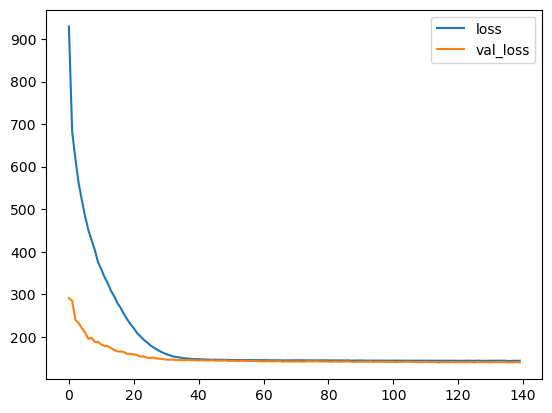

In [23]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [24]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions, columns=["Predict"])
sample["Actual"] = y_test


879/879 [==============================] - 1s 833us/step


,Predict,Actual
0,51.917099,47.0
1,53.035294,53.0
2,51.771652,56.0
3,52.612488,52.0
4,49.737282,20.0


In [25]:
sample.head(10)

,Predict,Actual
0,51.917099,47.0
1,53.035294,53.0
2,51.771652,56.0
3,52.612488,52.0
4,49.737282,20.0
5,50.190777,47.0
6,48.966434,26.0
7,52.362911,43.0
8,52.857048,55.0
9,49.136639,48.0


In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,predictions)


9.271483621395795

In [27]:
np.sqrt(mean_squared_error(y_test,predictions))


11.82487159295564

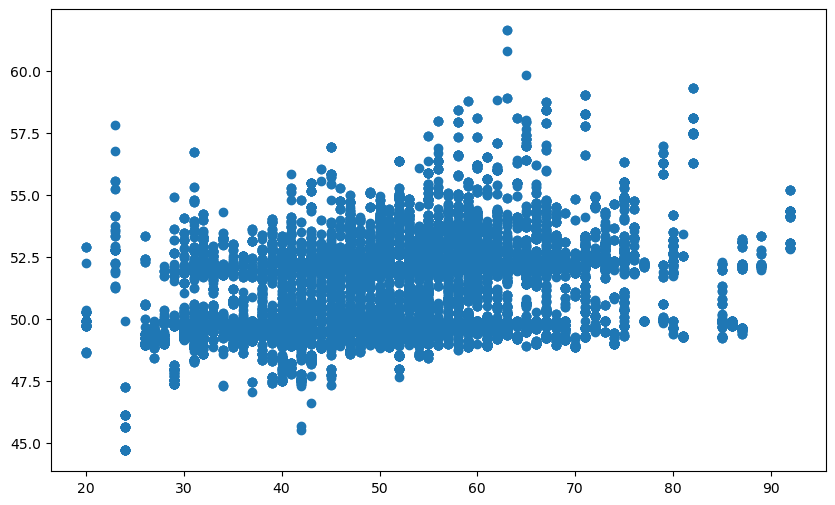

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions);

# Save The Model

In [30]:
import pickle

In [32]:
with open('model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)
    f_out.close()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 43)                301       
                                                                 
 dropout (Dropout)           (None, 43)                0         
                                                                 
 dense_1 (Dense)             (None, 22)                968       
                                                                 
 dropout_1 (Dropout)         (None, 22)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                253       
                                                                 
 dropout_2 (Dropout)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1